In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/sample_data/ibtracs.last3years.list.v04r01.csv")

In [4]:
df

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,,Year,,,,,,,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,2022008S13148,2022,1,SP,EA,TIFFANY,2022-01-08 00:00:00,MX,-12.6,147.7,...,45,,,,,,,,6,160
2,2022008S13148,2022,1,SP,EA,TIFFANY,2022-01-08 03:00:00,MX,-12.9,147.8,...,,,,,,,,,5,160
3,2022008S13148,2022,1,SP,EA,TIFFANY,2022-01-08 06:00:00,MX,-13.1,147.9,...,45,,,,,,,,4,160
4,2022008S13148,2022,1,SP,EA,TIFFANY,2022-01-08 09:00:00,MX,-13.2,147.9,...,,,,,,,,,2,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23271,2025339S14210,2026,105,SP,MM,UNNAMED,2025-12-05 18:00:00,NR,-17.4,-147.1,...,,,,,,,,,14,160
23272,2025339S14210,2026,105,SP,MM,UNNAMED,2025-12-05 21:00:00,NR,-18.0,-147.0,...,,,,,,,,,13,175
23273,2025339S14210,2026,105,SP,MM,UNNAMED,2025-12-06 00:00:00,NR,-18.7,-147.0,...,,,,,,,,,14,170
23274,2025339S14210,2026,105,SP,MM,UNNAMED,2025-12-06 03:00:00,NR,-19.4,-146.8,...,,,,,,,,,16,165


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23276 entries, 0 to 23275
Columns: 174 entries, SID to STORM_DIR
dtypes: int64(1), object(173)
memory usage: 30.9+ MB


In [6]:
df.columns

Index(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME',
       'NATURE', 'LAT', 'LON',
       ...
       'BOM_GUST_PER', 'REUNION_GUST', 'REUNION_GUST_PER', 'USA_SEAHGT',
       'USA_SEARAD_NE', 'USA_SEARAD_SE', 'USA_SEARAD_SW', 'USA_SEARAD_NW',
       'STORM_SPEED', 'STORM_DIR'],
      dtype='object', length=174)

In [7]:
df_clean = df.iloc[1:].copy()

numeric_cols = ['LAT', 'LON', 'WMO_WIND', 'WMO_PRES']
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# 3. Convert Time column
df_clean['ISO_TIME'] = pd.to_datetime(df_clean['ISO_TIME'])

# 4. Filter for South Asia (North Indian Ocean Basin - 'NI')
# This includes Bay of Bengal ('BB') and Arabian Sea ('AS')
south_asia_df = df_clean[df_clean['BASIN'] == 'NI'].copy()

# Optional: Filter specifically for Bay of Bengal (closer to Bangladesh)
# bangladesh_area_df = south_asia_df[south_asia_df['SUBBASIN'] == 'BB']

print(f"Data filtered! Found {len(south_asia_df)} records for South Asia.")
south_asia_df.head()

Data filtered! Found 1350 records for South Asia.


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
1154,2022062N06085,2022,16,NI,BB,UNNAMED,2022-03-03 00:00:00,TS,6.5,84.9,...,,,,,,,,,10,280
1155,2022062N06085,2022,16,NI,BB,UNNAMED,2022-03-03 03:00:00,TS,6.5,84.4,...,,,,,,,,,10,290
1156,2022062N06085,2022,16,NI,BB,UNNAMED,2022-03-03 06:00:00,TS,6.8,84.0,...,,,,,,,,,9,320
1157,2022062N06085,2022,16,NI,BB,UNNAMED,2022-03-03 09:00:00,TS,7.2,83.8,...,,,,,,,,,9,340
1158,2022062N06085,2022,16,NI,BB,UNNAMED,2022-03-03 12:00:00,TS,7.7,83.7,...,,,,,,,,,8,340


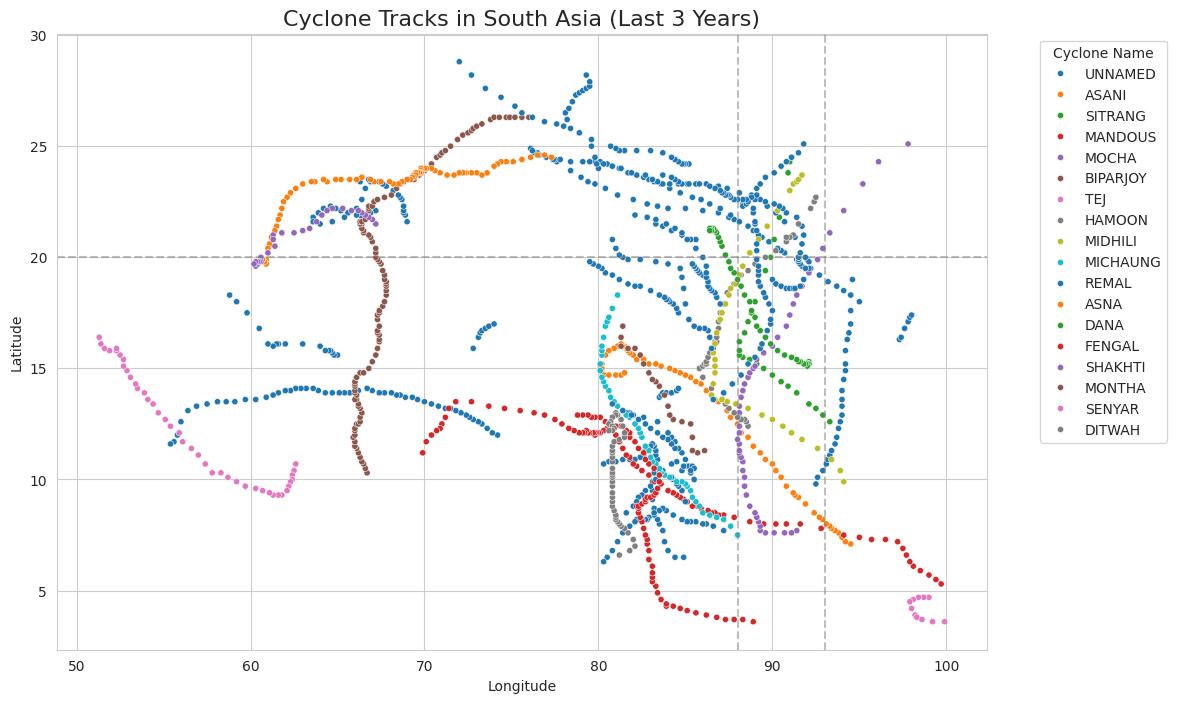

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=south_asia_df,
    x='LON',
    y='LAT',
    hue='NAME',
    palette='tab10',
    s=20,
    legend='full'
)

# Adding map boundaries:
# Bangladesh is roughly between Lat 20-27 and Lon 88-93
plt.axvline(x=88, color='gray', linestyle='--', alpha=0.5) # West border approx
plt.axvline(x=93, color='gray', linestyle='--', alpha=0.5) # East border approx
plt.axhline(y=20, color='gray', linestyle='--', alpha=0.5) # South border approx

plt.title('Cyclone Tracks in South Asia (Last 3 Years)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cyclone Name')
plt.grid(True)
plt.show()

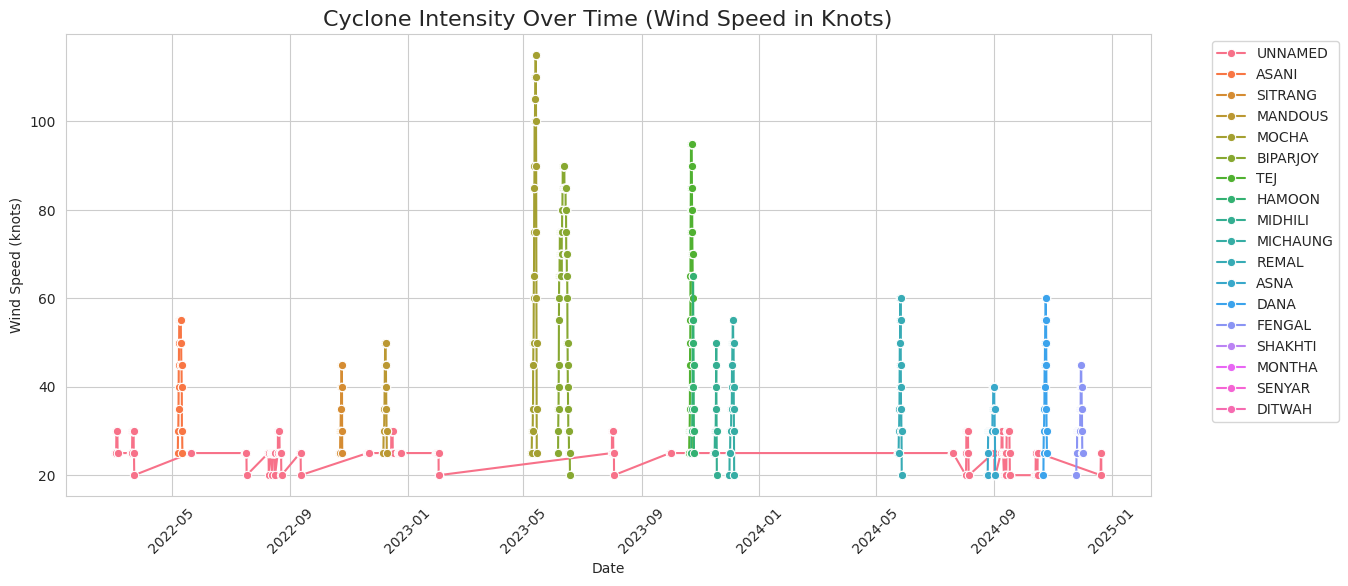

In [9]:
plt.figure(figsize=(14, 6))

# Plotting Wind Speed over time
sns.lineplot(
    data=south_asia_df,
    x='ISO_TIME',
    y='WMO_WIND',
    hue='NAME',
    marker='o'
)

plt.title('Cyclone Intensity Over Time (Wind Speed in Knots)', fontsize=16)
plt.ylabel('Wind Speed (knots)')
plt.xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [10]:
south_asia_df.to_csv('south_asia_cyclones_bangladesh.csv', index=False)

print("File saved successfully as 'south_asia_cyclones_bangladesh.csv'")

try:
    from google.colab import files
    files.download('south_asia_cyclones_bangladesh.csv')
except ImportError:
    print("Not running in Google Colab. The file is saved in your current directory.")

File saved successfully as 'south_asia_cyclones_bangladesh.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
df_new = pd.read_csv("/content/south_asia_cyclones_bangladesh.csv")
df_new

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,2022062N06085,2022,16,NI,BB,UNNAMED,2022-03-03 00:00:00,TS,6.5,84.9,...,,,,,,,,,10,280
1,2022062N06085,2022,16,NI,BB,UNNAMED,2022-03-03 03:00:00,TS,6.5,84.4,...,,,,,,,,,10,290
2,2022062N06085,2022,16,NI,BB,UNNAMED,2022-03-03 06:00:00,TS,6.8,84.0,...,,,,,,,,,9,320
3,2022062N06085,2022,16,NI,BB,UNNAMED,2022-03-03 09:00:00,TS,7.2,83.8,...,,,,,,,,,9,340
4,2022062N06085,2022,16,NI,BB,UNNAMED,2022-03-03 12:00:00,TS,7.7,83.7,...,,,,,,,,,8,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,2025331N07081,2025,103,NI,BB,DITWAH,2025-12-02 00:00:00,NR,12.5,80.6,...,,,,,,,,,2,130
1346,2025331N07081,2025,103,NI,BB,DITWAH,2025-12-02 03:00:00,NR,12.4,80.8,...,,,,,,,,,4,125
1347,2025331N07081,2025,103,NI,BB,DITWAH,2025-12-02 06:00:00,NR,12.3,80.9,...,,,,,,,,,2,160
1348,2025331N07081,2025,103,NI,BB,DITWAH,2025-12-02 09:00:00,NR,12.2,80.8,...,,,,,,,,,3,250
